In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df=pd.read_csv(r"C:\Users\samda\Downloads\Assignments\Data FIles\book_association.csv")

In [3]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
df.size

22000

In [6]:
df.sum(axis=0)

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

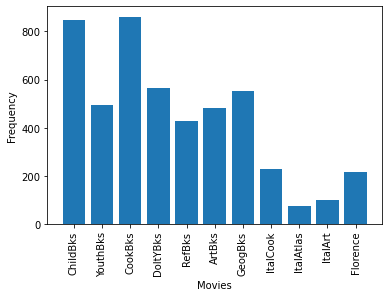

In [7]:
plt.bar (df.columns ,df.sum(axis=0))
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

In [8]:
df_sales = apriori(df, min_support=0.005, max_len=2,use_colnames = True)
print("Original data",df_sales.head())

Original data    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


In [9]:
df_sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value: \n",df_sales.head())


Sorted as per Support value: 
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (ChildBks, CookBks)


In [10]:
rules = association_rules(df_sales, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
102,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
68,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
69,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
87,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
...,...,...,...,...,...,...,...,...,...
59,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
74,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
75,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
60,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


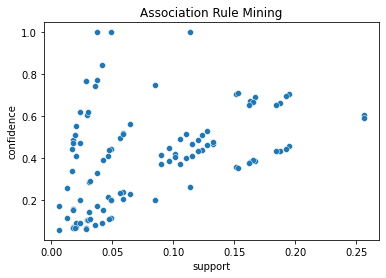

In [11]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

C:\Users\samda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samda\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


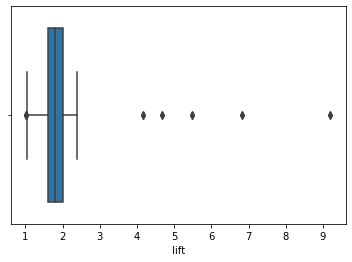

In [12]:
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

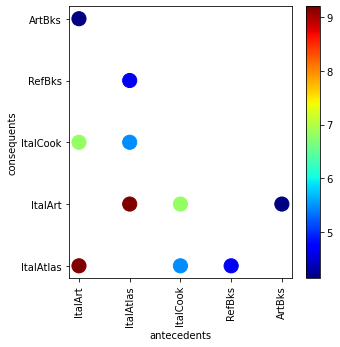

In [13]:
A1 = rules.antecedents.iloc[0:10]
B1 = rules.consequents.iloc[0:10]
C1 = rules.lift.iloc[0:10]

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [14]:
df_Sales = apriori(df, min_support=0.003, max_len=4,use_colnames = True)
print("Raw Data:\n",df_Sales.head())

df_Sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",df_Sales.head())

Raw Data:
    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)

Sorted as per Support value:
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (ChildBks, CookBks)


In [15]:
rules1 = association_rules(df_Sales, metric="lift", min_threshold=2)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1733,"(ItalArt, RefBks)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
1732,"(ItalAtlas, ArtBks)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
4174,"(ItalArt, RefBks)","(ItalAtlas, Florence)",0.0200,0.0065,0.0040,0.200000,30.769231,0.003870,1.241875
4171,"(ItalAtlas, Florence)","(ItalArt, RefBks)",0.0065,0.0200,0.0040,0.615385,30.769231,0.003870,2.548000
2699,"(ItalArt, RefBks)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
...,...,...,...,...,...,...,...,...,...
346,"(GeogBks, ArtBks, YouthBks)",(ChildBks),0.0650,0.4230,0.0550,0.846154,2.000364,0.027505,3.750500
3885,"(ItalAtlas, Florence, RefBks)",(ChildBks),0.0065,0.4230,0.0055,0.846154,2.000364,0.002750,3.750500
3894,(ChildBks),"(ItalAtlas, Florence, RefBks)",0.4230,0.0065,0.0055,0.013002,2.000364,0.002750,1.006588
3954,"(ItalAtlas, Florence)",(ChildBks),0.0065,0.4230,0.0055,0.846154,2.000364,0.002750,3.750500


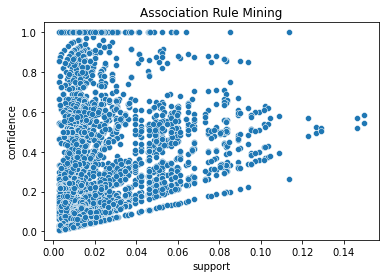

In [16]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule Mining")
plt.show()

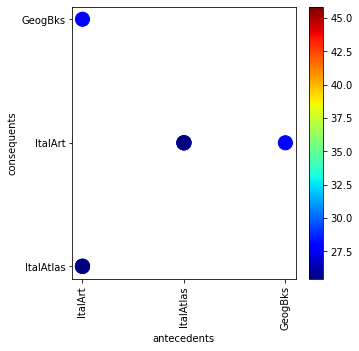

In [17]:
X1 = rules1.antecedents.iloc[0:10]
Y1 = rules1.consequents.iloc[0:10]
Z1 = rules1.lift.iloc[0:10]

X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [18]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [20]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [21]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


<AxesSubplot:xlabel='support', ylabel='confidence'>

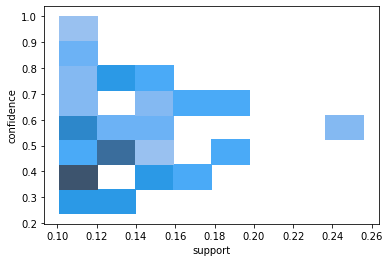

In [22]:
sns.histplot(x='support',y='confidence',data=rules)

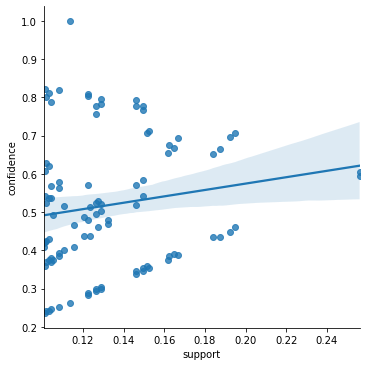

In [23]:
sns.lmplot(x='support',y='confidence',data=rules)

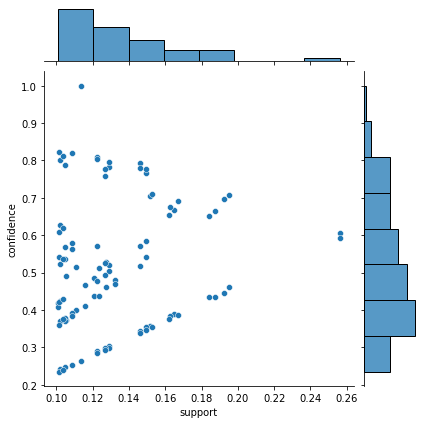

In [24]:
sns.jointplot(x='support',y='confidence',data=rules)